# **Job-A-THON November 2022 Contest - Harish B**

## Data Preprocessing

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Reading csv files

In [ ]:
dfInput = pd.read_csv("/content/train_IxoE5JN.csv", index_col = [1], parse_dates = [1])  # Train Data
dfOutput = pd.read_csv("/content/test_WudNWDM.csv", index_col = [1], parse_dates = [1])  # Test Data

#### Training Data

In [ ]:
dfInput.head()  # Displays top 5 rows of Train Data

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


#### Testing Data

In [ ]:
dfOutput.head()  # Displays top 5 rows of Test Data

,row_id
datetime,
2019-01-01 00:00:00,94993
2019-01-01 01:00:00,94994
2019-01-01 02:00:00,94995
2019-01-01 03:00:00,94996
2019-01-01 04:00:00,94997


#### Keeping Important Columns for Training Data and Dropping Row ID

In [ ]:
df2 = dfInput.drop(dfInput.iloc[:, 0:1],axis = 1)  # Dropping Row ID in Train Data as it is not an important feature
df2.head()  # Displays top 5 rows of the updated Train Data stored in df2 dataframe

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


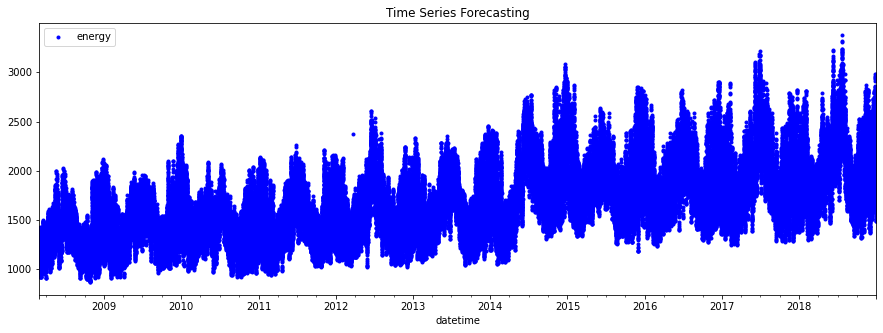

In [ ]:
df2.plot(style = '.' , color = "blue", figsize = (15,5), title = "Time Series Forecasting");  # Data Visualization for Train Data with respect to energy values and years

#### Analyzing Training set data and adding important features for DateTime

In [ ]:
df2['date'] = df2.index
df2['hour'] = df2['date'].dt.hour
df2['dayofweek'] = df2['date'].dt.dayofweek
df2['quarter'] = df2['date'].dt.quarter
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year
df2['dayofyear'] = df2['date'].dt.dayofyear
df2['dayofmonth'] = df2['date'].dt.day
df2['weekofyear'] = df2['date'].dt.weekofyear
df2.drop(['date'], axis = 1, inplace=True)

#### Checking for NULL Values

In [ ]:
df2.isna().sum(axis = 0)

energy        1900
hour             0
dayofweek        0
quarter          0
month            0
year             0
dayofyear        0
dayofmonth       0
weekofyear       0
dtype: int64

From the output, we can see there are 1900 NULL values presented in the energy column.

#### Dropping NULL Values

In [200]:
df2 = df2.dropna()

In [201]:
df2.isna().sum(axis = 0)

energy        0
hour          0
dayofweek     0
quarter       0
month         0
year          0
dayofyear     0
dayofmonth    0
weekofyear    0
dtype: int64

In [202]:
df2.head()

,energy,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2008-03-01 00:00:00,1259.985563,0,5,1,3,2008,61,1,9
2008-03-01 01:00:00,1095.541500,1,5,1,3,2008,61,1,9
2008-03-01 02:00:00,1056.247500,2,5,1,3,2008,61,1,9
2008-03-01 03:00:00,1034.742000,3,5,1,3,2008,61,1,9
2008-03-01 04:00:00,1026.334500,4,5,1,3,2008,61,1,9


#### Analyzing Testing set data and adding important features for DateTime

In [ ]:
dfOutput['date'] = dfOutput.index
dfOutput['hour'] = dfOutput['date'].dt.hour
dfOutput['dayofweek'] = dfOutput['date'].dt.dayofweek
dfOutput['quarter'] = dfOutput['date'].dt.quarter
dfOutput['month'] = dfOutput['date'].dt.month
dfOutput['year'] = dfOutput['date'].dt.year
dfOutput['dayofyear'] = dfOutput['date'].dt.dayofyear
dfOutput['dayofmonth'] = dfOutput['date'].dt.day
dfOutput['weekofyear'] = dfOutput['date'].dt.weekofyear
dfOutput.drop(['date'], axis = 1, inplace=True)

In [ ]:
dfOutput.head()

,row_id,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2019-01-01 00:00:00,94993,0,1,1,1,2019,1,1,1
2019-01-01 01:00:00,94994,1,1,1,1,2019,1,1,1
2019-01-01 02:00:00,94995,2,1,1,1,2019,1,1,1
2019-01-01 03:00:00,94996,3,1,1,1,2019,1,1,1
2019-01-01 04:00:00,94997,4,1,1,1,2019,1,1,1


## Data Visualization

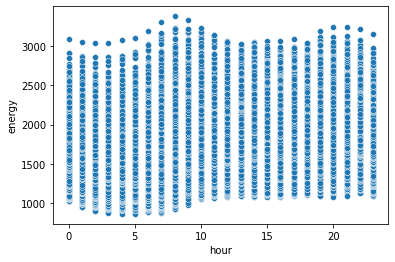

In [ ]:
import seaborn as sns
sns.scatterplot('hour','energy', data=df2)

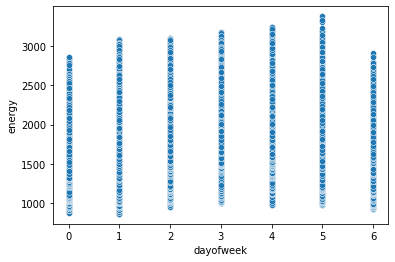

In [ ]:
sns.scatterplot('dayofweek','energy', data=df2)

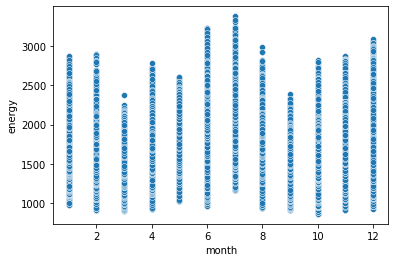

In [ ]:
sns.scatterplot('month','energy', data=df2)

(array([2006., 2008., 2010., 2012., 2014., 2016., 2018., 2020.]),
 <a list of 8 Text major ticklabel objects>)

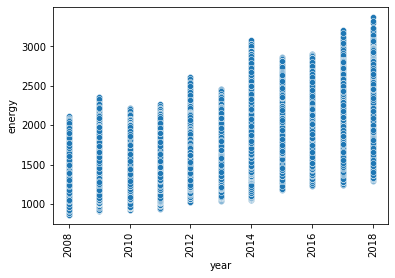

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot('year','energy', data=df2)
plt.xticks(rotation = 'vertical')

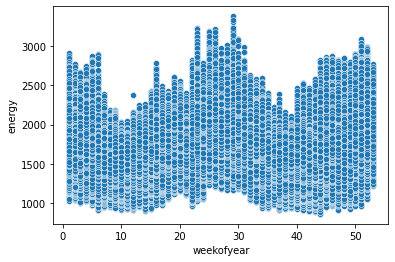

In [ ]:
sns.scatterplot('weekofyear','energy', data=df2)

#### Splitting Training Data into Training and Validation Set

In [ ]:
df2_train = df2.loc[df2.year < 2016]
df2_valid = df2.loc[df2.year >= 2016]

In [ ]:
df2_train.tail()

,energy,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2015-12-31 19:00:00,2563.1450,19,3,4,12,2015,365,31,53
2015-12-31 20:00:00,2477.1162,20,3,4,12,2015,365,31,53
2015-12-31 21:00:00,2384.3664,21,3,4,12,2015,365,31,53
2015-12-31 22:00:00,2351.4946,22,3,4,12,2015,365,31,53
2015-12-31 23:00:00,2198.1336,23,3,4,12,2015,365,31,53


In [ ]:
df2_valid.head()

,energy,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2016-01-01 00:00:00,2002.2470,0,4,1,1,2016,1,1,53
2016-01-01 01:00:00,1843.3870,1,4,1,1,2016,1,1,53
2016-01-01 02:00:00,1735.1178,2,4,1,1,2016,1,1,53
2016-01-01 03:00:00,1666.1970,3,4,1,1,2016,1,1,53
2016-01-01 04:00:00,1630.3924,4,4,1,1,2016,1,1,53


#### Training and Validation Set Visualization

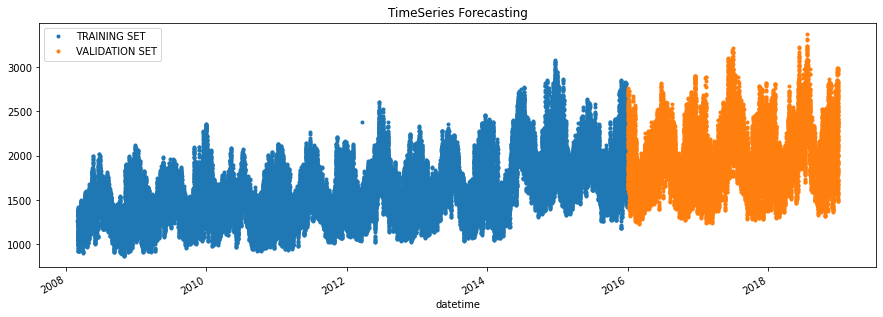

In [ ]:
(df2_train.rename(columns={'energy': 'TRAINING SET'})).append(df2_valid.rename(columns={'energy': 'VALIDATION SET'}), sort = False)[['TRAINING SET','VALIDATION SET']].plot(style='.', figsize = (15,5), title = "TimeSeries Forecasting");

In [ ]:
x_train = df2_train[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
x_valid = df2_valid[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
y_train = df2_train[['energy']]
y_valid = df2_valid[['energy']]

#### XG Boost Model for Energy Prediction

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

##### Fitting the Model

In [ ]:
reg = xgb.XGBRegressor(n_estimators = 1000)
reg.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_valid, y_valid)], early_stopping_rounds=50, verbose = False)

[07:08:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

##### Predicting Energy for Validation Set

In [ ]:
df2_valid['Energy_Prediction'] = reg.predict(x_valid)
df2_all = pd.concat([df2_valid, df2_train], sort = False)

##### Validation Set Energy Prediction Visualization

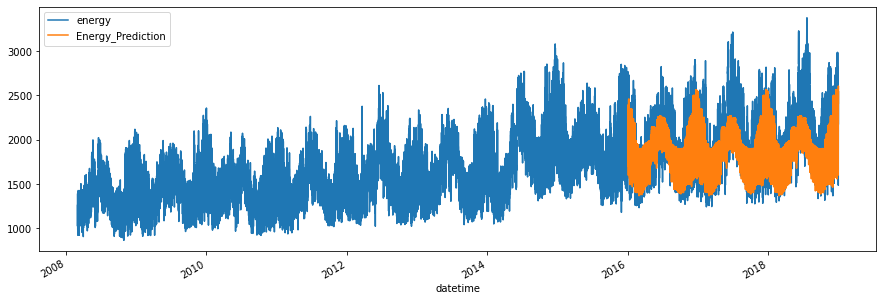

In [ ]:
df2_all[['energy','Energy_Prediction']].plot(figsize=(15, 5))

#### First Month of Prediction for Validation set

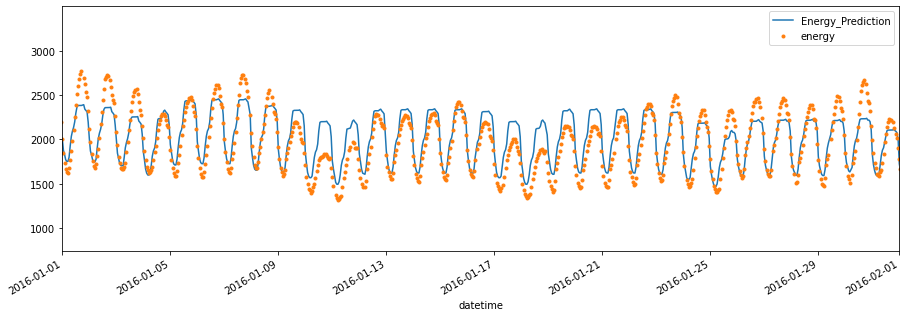

In [ ]:
_, ax = plt.subplots(1)
df2_all[['Energy_Prediction', 'energy']].plot(ax=ax, style=['-','.'], figsize=(15, 5))
ax.set_xbound(lower='01-01-2016', upper='02-01-2016')

#### Evaluating Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true = df2_valid['energy'], y_pred = df2_valid['Energy_Prediction'])

49432.382520169376

##### Evaluating Absolute Mean Squared Error

In [ ]:
mean_absolute_error(y_true = df2_valid['energy'], y_pred = df2_valid['Energy_Prediction'])

161.7390508435663

##### Evaluating Mean Absolute Percentage Error

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true = df2_valid['energy'], y_pred = df2_valid['Energy_Prediction'])

7.793077202107844

### Analysis of Worst and Best Predicted Day

In [ ]:
df2_valid['error'] = df2_valid['energy'] - df2_valid['Energy_Prediction']
df2_valid['abs_error'] = df2_valid['error'].apply(np.abs)

In [ ]:
error_by_day = df2_valid.groupby(['year','month','dayofmonth']).mean()[['energy','Energy_Prediction','error','abs_error']]

In [ ]:
error_by_day.head(10)

energy  Energy_Prediction       error   abs_error
year month dayofmonth                                                        
2016 1     1           2195.493017        2127.201416   68.291527  161.478172
           2           2237.578742        2117.852295  119.726411  155.644886
           3           2114.360408        2032.159058   82.201310  126.300342
           4           1970.480092        2000.936768  -30.456732   76.410145
           5           2069.477367        2155.396484  -85.919143   91.167830
           6           2116.565100        2167.103271  -50.538273  108.451611
           7           2192.289252        2156.781982   35.507259  117.222804
           8           2114.819765        2081.669922   33.149965   68.651457
           9           1932.572633        2055.179688 -122.607146  124.839572
           10          1660.972950        1947.075684 -286.102764  286.102764

#### Over Forecasted Days

In [ ]:
error_by_day.sort_values('error', ascending=True).head(10)

energy  Energy_Prediction       error   abs_error
year month dayofmonth                                                        
2016 6     13          1621.813725        2033.346802 -411.533026  411.533026
     12    26          1625.081400        2023.661987 -398.580550  398.580550
2017 12    27          1813.568633        2204.817139 -391.248577  391.248577
2016 6     12          1689.690052        2069.444336 -379.754215  379.754215
2017 12    28          1851.692104        2204.917725 -353.225578  353.225578
2016 12    27          1837.411537        2189.741211 -352.329729  352.329729
     10    25          1489.772896        1835.358398 -345.585535  345.585535
2017 12    17          1697.925133        2040.199219 -342.274101  342.274101
           14          1844.724933        2172.750977 -328.026150  328.026150
2016 5     25          1651.838500        1977.188110 -325.349646  325.349646

#### Worst Absolute Predicted Days

In [ ]:
error_by_day.sort_values('abs_error', ascending=False).head(10)

energy  Energy_Prediction       error   abs_error
year month dayofmonth                                                        
2018 7     21          3016.640191        2068.623291  948.016837  948.016837
           20          3032.919235        2086.053467  946.865768  946.865768
     6     8           2983.522667        2175.805908  807.716682  807.716682
     7     17          2882.103583        2077.670166  804.433473  804.433473
2017 6     24          2900.034870        2131.780518  768.254416  768.254416
           7           2937.202333        2175.805908  761.396349  761.396349
2018 7     16          2689.210438        1950.373169  738.837223  738.837223
2017 6     28          2883.471150        2147.185547  736.285695  736.285695
           29          2878.371650        2147.185547  731.186195  731.186195
2018 7     25          2778.349391        2071.902588  706.446835  706.446835

#### Best Absolute Predicted Days

In [ ]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

energy  Energy_Prediction      error  abs_error
year month dayofmonth                                                      
2018 3     15          1767.612817        1770.389648  -2.776776  26.365212
           16          1780.750883        1770.389648  10.361291  26.510000
     10    1           1586.673000        1581.599976   5.072989  27.024096
     3     7           1788.455964        1771.818237  16.637671  27.691014
2017 10    4           1783.077009        1795.841919 -12.764937  28.533435
2018 6     18          2025.836522        2032.215210  -6.378630  28.608729
2016 9     28          1759.537237        1778.614014 -19.076807  29.729059
2018 9     30          1636.444174        1637.572632  -1.128479  30.206598
     10    19          1800.224250        1786.462524  13.761695  30.431937
2016 8     14          1755.375975        1774.418457 -19.042513  30.927832

#### Plotting Best/Worst Predicted Days

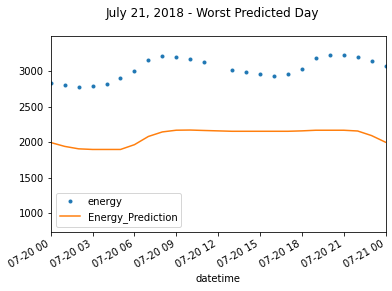

In [ ]:
_, ax = plt.subplots(1)
df2_all[['energy','Energy_Prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='07-21-2018', upper='07-20-2018')
plot = plt.suptitle('July 21, 2018 - Worst Predicted Day')

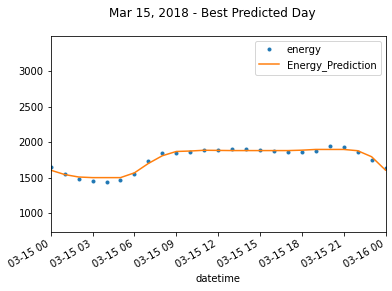

In [ ]:
_, ax = plt.subplots(1)
df2_all[['energy','Energy_Prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='03-15-2018', upper='03-16-2018')
plot = plt.suptitle('Mar 15, 2018 - Best Predicted Day')

#### Predicting Energy with Testing Data

In [ ]:
x_test = dfOutput[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]

In [ ]:
dfOutput['energy'] = reg.predict(x_test)

In [ ]:
dfOutput.head()

,row_id,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,energy
0,94993,0,1,1,1,2019,1,1,1,1925.846069
1,94994,1,1,1,1,2019,1,1,1,1839.723145
2,94995,2,1,1,1,2019,1,1,1,1751.345215
3,94996,3,1,1,1,2019,1,1,1,1707.612549
4,94997,4,1,1,1,2019,1,1,1,1695.541748


#### Saving the Solution File in csv Format

In [ ]:
sample = dfOutput.reset_index(drop=True, inplace=True)
sample = dfOutput.drop(dfOutput.iloc[:, 1:9],axis = 1)
sample.head()

,row_id,energy
0,94993,1925.846069
1,94994,1839.723145
2,94995,1751.345215
3,94996,1707.612549
4,94997,1695.541748


In [ ]:
sample.to_csv('Harish_solution.csv', index=False)